In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
from scipy.fft import fft2, ifft2
from scipy import signal

In [2]:
def blur_h(size, stddev):
    s, k = stddev, size #generates gaussian of size 2k+1 x 2k+1
    probs = [np.exp(-z*z/(2*s*s))/np.sqrt(2*np.pi*s*s) for z in range(-k,k+1)] 
    
    l = np.outer(probs, probs)
    h = l/np.sum(l)
    return h

def gaussianNoise(image, var):
    row,col = image.shape
    mean = 0
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col))
    gauss = gauss.reshape(row,col)/255    
    return gauss


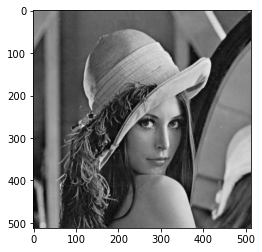

(512, 512)


In [3]:
f = image.imread("greyscale_lenna.png")
plt.imshow(f, cmap = 'gray')
plt.show()
print(f.shape)

(5, 5)
[[0.03987213 0.03996794 0.03999993 0.03996794 0.03987213]
 [0.03996794 0.04006398 0.04009604 0.04006398 0.03996794]
 [0.03999993 0.04009604 0.04012813 0.04009604 0.03999993]
 [0.03996794 0.04006398 0.04009604 0.04006398 0.03996794]
 [0.03987213 0.03996794 0.03999993 0.03996794 0.03987213]]
(512, 512)


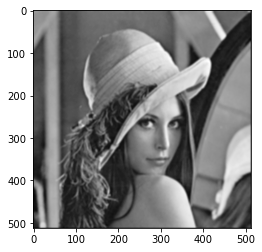

In [4]:
h = blur_h(2,25)
print(h.shape)
print(h)
blur_image = signal.convolve2d(f,h, mode = 'same')
print(blur_image.shape)
plt.imshow(blur_image, cmap = 'gray')
plt.show()

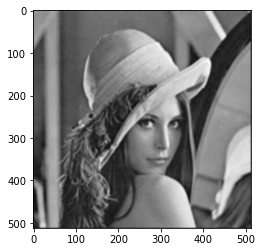

In [5]:
noise_var = 9
noise = gaussianNoise(f,noise_var)
noisy_image = noise + blur_image
plt.imshow(noisy_image, cmap = 'gray')
plt.show()

(512, 512)


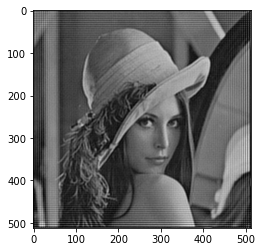

In [6]:
G = fft2(noisy_image)
H = fft2(h, s = noisy_image.shape)
H_c = np.conj(H)

F = G * (H_c/(np.abs(H)**2 + (noise_var / np.abs(G)**2)))
output = np.abs(ifft2(F))
print(output.shape)
plt.imshow(output, cmap = 'gray')
plt.show()

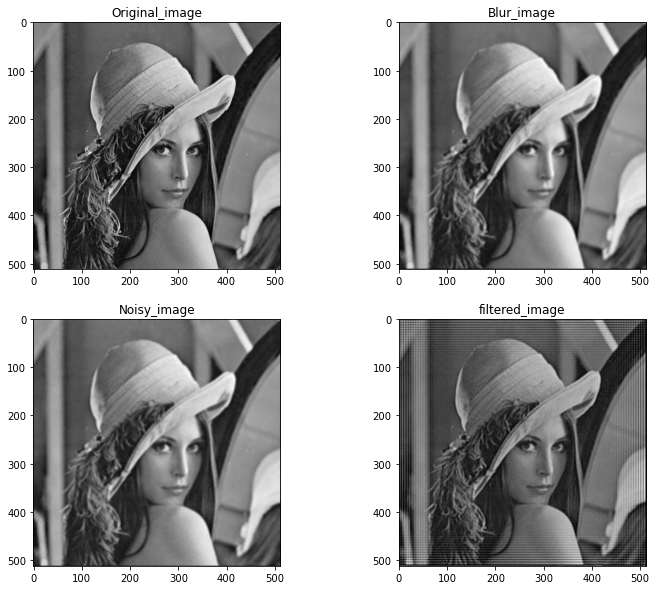

In [7]:
images = [f, blur_image, noisy_image, output]
label = [ 'Original_image','Blur_image','Noisy_image','filtered_image']
fig = plt.figure(figsize = (12,10))
for i in  range(len(images)):
    fig.add_subplot(2,2,i+1)
    plt.imshow(images[i],cmap = 'gray')
    plt.title(label[i])
    
plt.show()